# Perceptron Classifier Example
Here is demonstrate how to use the Perceptron module from the `rice_ml` library to classify data.\
In this example, a simplified version of the Iris dataset will be used to train, test, and evaluate the model.\
**Goal: Predict the species of Iris flower based on its physical measurements, using binary encoding of {-1,1}**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from rice_ml.supervised_learning.perceptron import Perceptron
from rice_ml.processing.preprocessing import train_test_split, standardize
from rice_ml.processing.post_processing import accuracy_score
import matplotlib.pyplot as plt

## 1. Load Data and Preparation
The Perceptron requires binary target encoded as {-1,1}. Load the first 100 samples of the Iris dataset, representing two linearly separable classes.

In [2]:
# Load the Iris dataset
iris = load_iris()

# Use the first 100 samples (Classes 0 and 1) and the first two features
X_raw = iris.data[:100, [0, 2]] # Sepal Length, Petal Length
y_raw = iris.target[:100]

# Encode targets to {-1, 1}
# Class 0 (Iris-setosa) -> -1
# Class 1 (Iris-versicolor) -> 1
y = np.where(y_raw == 0, -1, 1) 

print(f"Total Samples: {X_raw.shape[0]}")
print(f"Target Encoding: {np.unique(y)}")

Total Samples: 100
Target Encoding: [-1  1]


## 2. Data Pre-Processing: Scaling and Splitting
Standardization (Z-score scaling) is applied to the features to help ensure an efficient learning process. The data is then split into training and testing sets.

In [3]:
# 1. Split data into training and test sets *before* scaling
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size = 0.3, random_state = 67
)

# 2. Fit the scaler on the training set and capture the parameters
# (Fit and Transform mode)
X_train_scaled, params = standardize(X_train_raw, return_params=True)

# 3. Apply the fit to the test set using the captured parameters (Transform only mode)
X_test_scaled = standardize(
    X_test_raw, 
    mean=params['mean'], 
    scale=params['scale']
)

# Verification
print(f"\nTraining Set Size: {X_train_scaled.shape[0]} samples")
print(f"Test Set Size: {X_test_scaled.shape[0]} samples")
print("Standardization applied using only training data statistics (no data leakage).")


Training Set Size: 70 samples
Test Set Size: 30 samples
Standardization applied using only training data statistics (no data leakage).


## 3. Initialize and Train the Model
We initialize the `Perceptron` and fit the model. Since the data is linearly separable, the model is expected to converge before reaching the maximum number of epochs.

In [4]:
# Initialize Perceptron model
ppn = Perceptron(
    eta=0.1, 
    epochs=10, # Max 10 epochs (should converge sooner)
    random_state=21
)

print("\nBeginning Perceptron Training (Error-Correction Learning)...")

# Fit the model to the training data
ppn.fit(X_train_scaled, y_train)

print("Training Complete.")


Beginning Perceptron Training (Error-Correction Learning)...
Converged at epoch 2
Training Complete.


## 4. Prediction and Evaluation
Evaluate the model's final performance on the unseen test set.

In [5]:
# 1. Generate predictions on the held-out test set
y_pred = ppn.predict(X_test_scaled)

# 2. Calculate the Accuracy Score
# Assuming your accuracy_score handles the direct comparison of {-1, 1}:
accuracy = accuracy_score(y_test, y_pred)

print(f"\n--- Evaluation Results ---")
print(f"Final Accuracy: {accuracy:.4f}")
print(f"Final Weights (W): {ppn.w_}")


--- Evaluation Results ---
Final Accuracy: 1.0000
Final Weights (W): [0.28452452 0.65224217 0.32096635]


## 5. Analyzing Convergence
Plot the number of misclassifications (errors) that occurred during each pass (epoch) over the training data to visualize the convergence process.

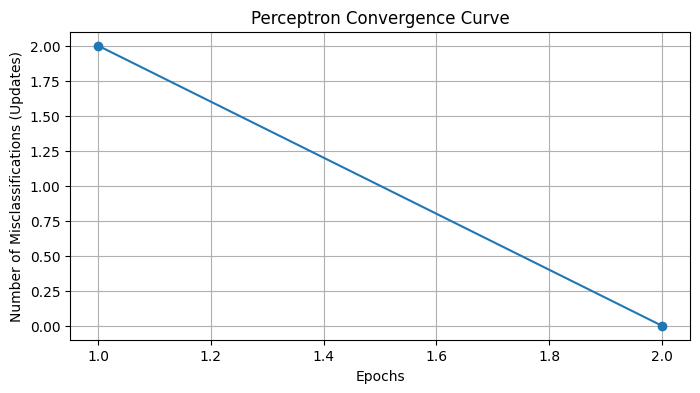

In [6]:
# Plotting the errors per epoch
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications (Updates)')
plt.title('Perceptron Convergence Curve')
plt.grid(True)
plt.show()

# Since the errors dropped to zero and the loop printed "Converged at epoch X", the plot confirms the model found the perfect linear boundary.